# Project:No Show Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
Context
A person makes a doctor appointment, receives all the instructions and no-show. Who is to be blamed?

Content
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory.

scholarship variable means this concept [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).

14 variables

Data Dictionary
01 - PatientId
Identification of a patient
02 - AppointmentID
Identification of each appointment
03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of their health in comparison to man.
04 - ScheduledDay
The day of the actual appointment, when they have to visit the doctor.
05 - AppointmentDay
The day someone called or registered the appointment, this is before appointment of course.
06 - Age
How old the patient is.
07 - Neighbourhood
Where the appointment takes place.
08 - Scholarship
True or False. Observation, this is a broad topic, consider reading this article [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
09 - Hipertension
True or False
10 - Diabetes
True or False
Alcoholism
True or False
Handcap
True or False
SMS_received
1 or more messages sent to the patient.
No-show
True or False.



### Questions for Analysis
>**1.** Does the Neighbourhood affect the chances of patients showing up?

>**2.** Will receiving an sms from the hospital affect the chances of patients showing up?

>**3.** Can scholarships affect the chances of patients showing up?

>**4.**  Can a patient's age affect the chances of him/her showing up?

>**5.** Can the Gender of patients influence the attendance rate?

In [1]:
#importing required packages for the data analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#loaded the csv_data to be analysed.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#to view the first five rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#to view the last five rows of the data
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Inspecting the datatypes

In [5]:
#to view a general summary of the data, including the various datatypes and total count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


To view a descriptive analysis of the whole data

In [6]:
#to get the dimensions of the data
df.shape

(110527, 14)

To check for the sum of missing values for all the data

In [7]:
#check the sum of all missing values in the data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the observation above, the data contains no missing value

In [8]:
#check for unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the values above, there is a big difference between count of PatientID and count of AppointmentID, which could be as a result of duplicated data. So I will check for duplicates in both PatientID and No_show to trim out any duplicated data.

To check for duplicates

In [9]:
df.duplicated().sum()

0

To check for duplicates in patients id

In [10]:
#check the sum of duplicated values in the 'PatientId' column
df['PatientId'].duplicated().sum()

48228

In [11]:
#check the sum of duplicated values in both the PatientId column and No-show column which will be cleaned out
df.duplicated(['PatientId', 'No-show']).sum()

38710

Okay, so there are 38710 occurrances of same data for both PatientId and No_show, which I will clean out

In [12]:
#drops the duplicated values found in the step above and updates the data with the change
df.drop_duplicates(['PatientId', 'No-show'], inplace=True)

In [13]:
#outputs the descriptive statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181700e+04,7.181700e+04,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000,71817.000000
mean,1.466294e+14,5.666495e+06,36.526978,0.095534,0.195065,0.070958,0.025036,0.020135,0.335561
std,2.544927e+14,7.313144e+04,23.378518,0.293954,0.396254,0.256757,0.156235,0.155337,0.472190
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175978e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189717e+13,5.672884e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716568e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the descriptive statistics above, it can  be infered that the mean for the age column is 32, the mininum age is -1 which must have been a typo error and will be trimmed out, more than 75% of the patients were not on scholarship. Also, more than 75% of the patients did not have hypertension or diabetes or were alcoholic or were handicapped.

Trim the typo error (-1) in the age column

In [14]:
#Picks out the error row that contains the '-1' value in the Age column
df.query('Age == "-1"')
#drops the row containing the typo error
df.drop(index=99832, inplace=True)

In [15]:
#outputs the descriptive statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.181600e+04,7.181600e+04,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,1.466249e+14,5.666493e+06,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,2.544917e+14,7.313083e+04,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175956e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189425e+13,5.672882e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716567e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### The next three lines of code corrects the column name for No-show, Hipertension and Handcap

Renamed the "No-show" column to "No_show" 

In [16]:
#corrects the column name for No-show
df.rename(columns= {'No-show': 'No_show'}, inplace=True)

Renamed the "Hipertension" column to "Hypertension".

In [17]:
#corrects the column name for Hipertension
df.rename(columns= {'Hipertension': 'Hypertension'}, inplace=True)

Renamed the "Handcap" column to "Handicap".

In [18]:
#corrects the column name for Handcap
df.rename(columns= {'Handcap': 'Handicap'}, inplace=True)

In [19]:
#outputs the column names of the data
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

In [20]:
#Randomly selects five rows
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
73136,2.221533e+14,5664291,F,2016-05-05T11:46:17Z,2016-05-18T00:00:00Z,38,BARRO VERMELHO,0,0,0,0,0,0,No
20873,1.992582e+10,5712704,M,2016-05-18T09:08:41Z,2016-05-24T00:00:00Z,40,VILA RUBIM,0,0,0,0,0,1,No
63423,2.676485e+14,5673810,F,2016-05-09T09:53:45Z,2016-05-11T00:00:00Z,14,NOVA PALESTINA,0,0,0,0,0,0,Yes
36351,7.388932e+13,5665349,M,2016-05-05T14:18:18Z,2016-05-11T00:00:00Z,61,SÃO PEDRO,0,1,0,0,0,1,No
70452,6.448127e+13,5694530,F,2016-05-13T08:44:25Z,2016-05-13T00:00:00Z,26,GURIGICA,0,0,0,0,0,0,No


In [21]:
#Prints the first five rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#last five rows of the dataset
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No


In [23]:
#Gives the shape of the data
df.shape

(71816, 14)

Checking the datatype of all the columns

In [24]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_show            object
dtype: object

In [25]:
# converting some columns that has date to a datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Confirming the changes

In [26]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No_show                        object
dtype: object

Seperate the data into two sets; present for patients that show up and absent for patients that did not show up.

In [27]:
#Divides the data into two sets: present for those that showed and absent for those that did not show
present = df.No_show == 'No'
absent = df.No_show == 'Yes'

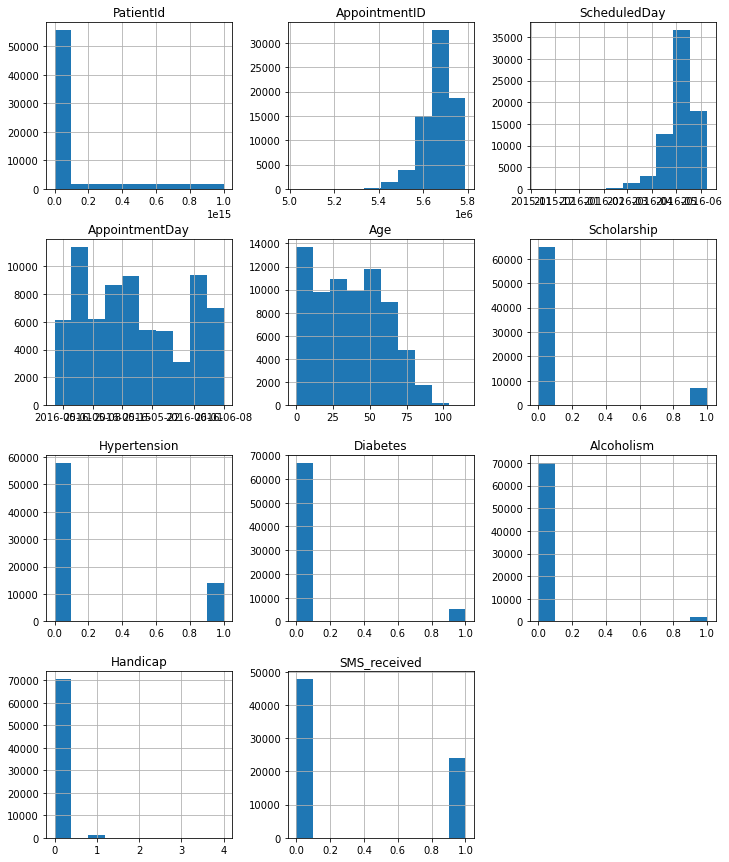

In [28]:
#Outputs a general visualization of the data in a histogram chart
df.hist(figsize=(12, 15));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does neighbourhood affect patient's chances of showing up or not.

We start by creating a function to plot the visualizations which will be in bar charts.

In [29]:
#defines a function to plot a bar chart
def plot_bar(column, title, xlabel, ylabel):
    #sets the figure  size of the visualization
    plt.figure(figsize=[16, 6])
    #plots the comparison data between the neighbourhood column and the No_show column
    column[present].value_counts().plot(kind='bar', label='present', color='purple')
    column[absent].value_counts().plot(kind='bar', label='absent', color='green')
    plt.legend()
    #creates the charts name
    plt.title(title)
    #gives the label name for the x_axis
    plt.xlabel(xlabel)
    #creates the label name for the y_axis
    plt.ylabel(ylabel);

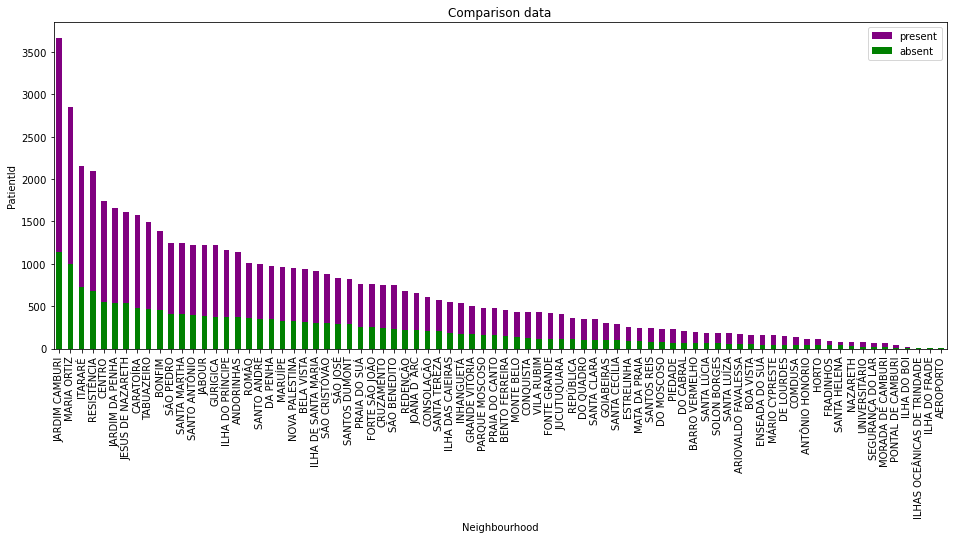

In [30]:
plot_bar(df.Neighbourhood, 'Comparison data', 'Neighbourhood', 'PatientId')

From the visualization above, the chart is skewed to the right, with the highest number of patients that were present coming from JARDIM CAMBURI neighbourhood

### Research Question 2: Will receiving an sms from the hospital affect the chances of patients showing up?


Outputs the data's column names

In [31]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

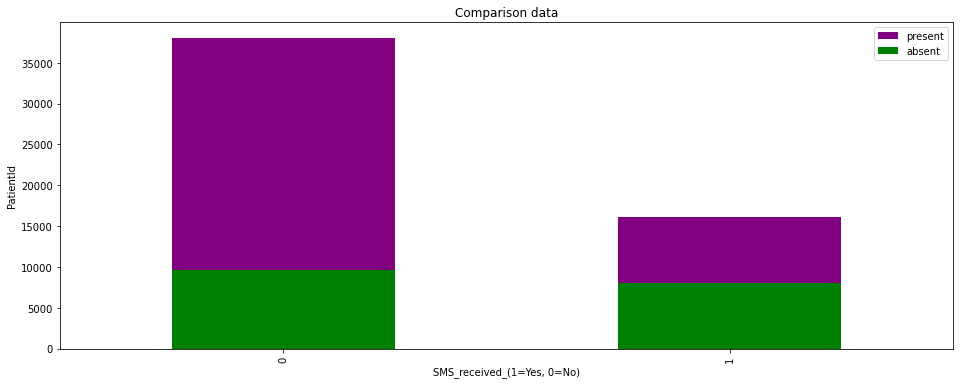

In [32]:
#plot the bar chart with the given variables
plot_bar(df.SMS_received, 'Comparison data', 'SMS_received_(1=Yes, 0=No)', 'PatientId')

From the visualization above, most of the patients that showed up did not get an sms so this column is not a determining factor of patients that showed up or not.

### Research Question 3: Does scholarship affect the chances of patients showing up?

Outputs the data's column names

In [33]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

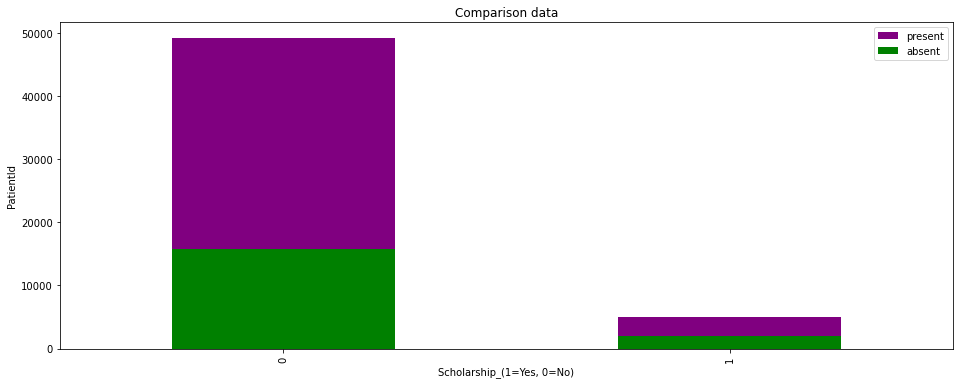

In [34]:
plot_bar(df.Scholarship, 'Comparison data', 'Scholarship_(1=Yes, 0=No)', 'PatientId')

The above visualization shows that most of the patients whose data was recorded in this dataset were not on scholarships. With most of the non-scholarship beneficiaries showing up.

### Research Question 4: Can a patient's age affect the chances of him/her showing up?

Outputs the data's column names

In [35]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

Groups the age columns into four different categories

In [36]:
#Grouped the Age column using pandas.cut
bin_edges = [0, 20, 40, 70, 115]
bin_names = ['child', 'youth', 'adult', 'old']
df['Age'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [37]:
#Test to confirm the changes made
df['Age'].unique()

['adult', 'child', 'old', 'youth', NaN]
Categories (4, object): ['child' < 'youth' < 'adult' < 'old']

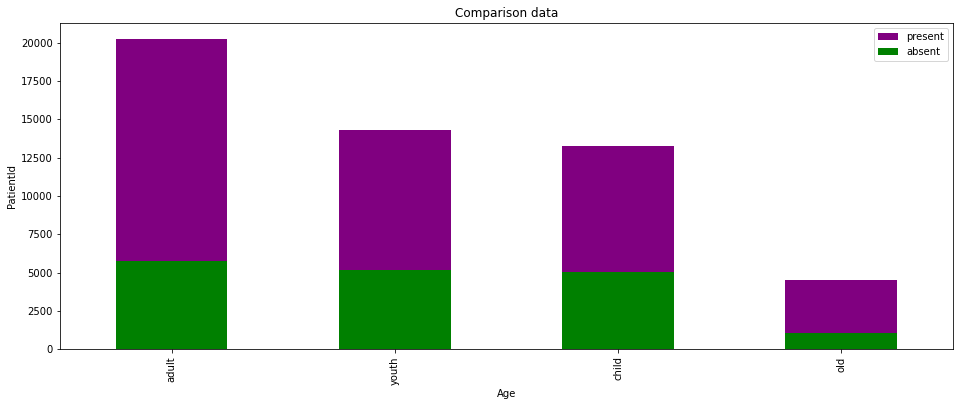

In [38]:
plot_bar(df.Age, 'Comparison data', 'Age', 'PatientId')

A good number of the patients fall within the adult range and are also the leading group of people to show up on the appointment day.
While the patients that fall within the old Agers lag behind the rest of the groups of patients. Although, most of them showed up.

### Research Question 5: Can the Gender of patients influence the attendance rate?

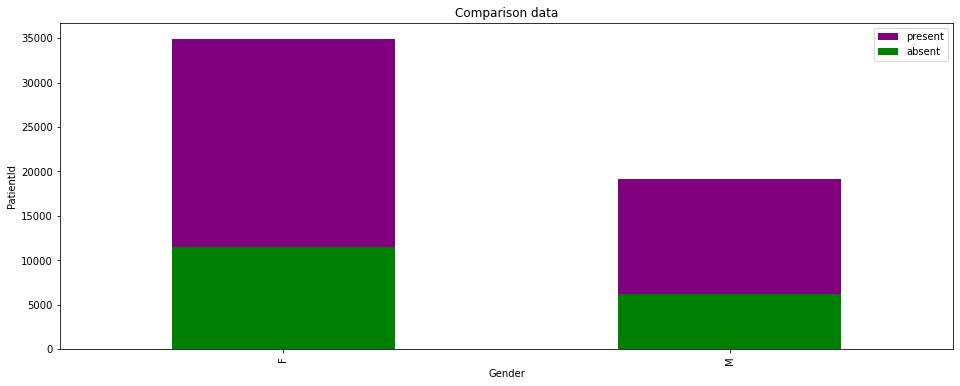

In [39]:
plot_bar(df.Gender, 'Comparison data', 'Gender', 'PatientId')

From the illustration above, females are more than males. They also showed up a lot more than the males.

<a id='conclusions'></a>
## Conclusions

Missing values would influence the results of the analysis, since those rows will be dropped which will certainly lead to conclusions varying from when those values are provided.

The neighbourhood has a significant effect on the chances of patients showing up, with the highest number coming from JARDIM CAMBURI.

According to the analysis, scholarship does not have a significant effect on the attendance rate of the patients

Patients that received a sms were less likely to show up based on the data analysed, which concludes that investigations should be made to identify what went wrong.

Age has an influence as most of those that showed were adults with the old ones showing up the least number of times, probably due to their mobility disadvantage or no one being there to help them.

## Limitations

Complete conclusions cannot be provided with the limited features given as more features would provide extra insights or give more reasons for patients showing up or not.